In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('olympic_athletes.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [55]:
# df.dropna(subset=['Height'], inplace=True)
df.drop_duplicates(subset=['ID'], keep='first', inplace=True)

In [56]:
def fetch_data(data, sport, year):
    return data[(data['Sport'] == sport) & (data['Year']>=year)]['Height']

gymnastics_df = fetch_data(df, 'Gymnastics', 2000)
cycling_df = fetch_data(df, 'Cycling', 2000)
basketball_df = fetch_data(df, 'Basketball', 2000)

sports_list = [gymnastics_df, cycling_df, basketball_df]

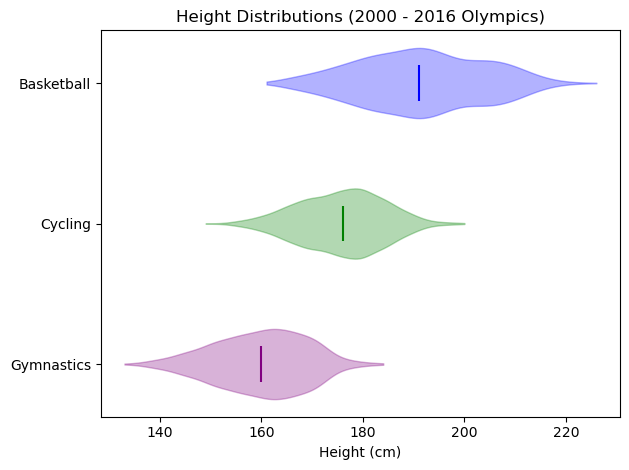

In [57]:
fig, ax = plt.subplots()
plot = ax.violinplot(sports_list, vert=False, showmedians=True, showextrema=False)
ax.set_yticks([1, 2, 3], ['Gymnastics', 'Cycling', 'Basketball'])

colors = ['purple', 'green', 'blue']
for i, pc in enumerate(plot['bodies']):
    pc.set_color(colors[i])
    pc.set_linewidth(1)

plot['cmedians'].set_colors(colors)
ax.set_xlabel('Height (cm)')
ax.set_title('Height Distributions (2000 - 2016 Olympics)')
plt.tight_layout()
# plt.savefig('violinplot.png', dpi=300)

In [59]:
df.drop_duplicates(subset=['ID', 'Year'], keep='first', inplace=True)

In [60]:
data = df[df['Season']=='Summer'].groupby(['Year', 'Sex'])['Height'].mean().unstack()

In [61]:
error = df[df['Season']=='Summer'].groupby(['Year', 'Sex'])['Height'].std().unstack()

(140.0, 200.0)

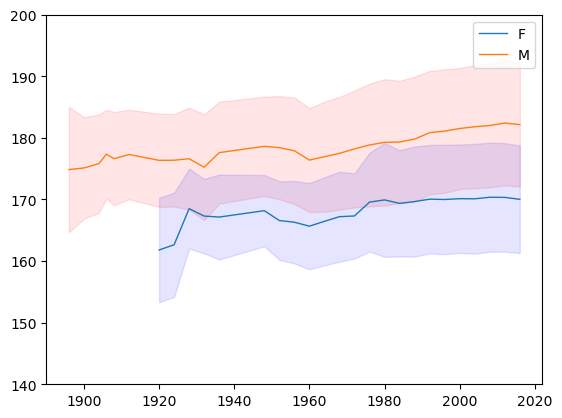

In [63]:
plt.plot(data, linewidth=1)
plt.legend(data.columns)
plt.fill_between(data['M'].index, data['M']+error['M'], data['M']-error['M'], alpha=0.1, color='red')
plt.fill_between(data['F'].index, data['F']+error['F'], data['F']-error['F'], alpha=0.1, color='blue')
plt.ylim(140, 200)

In [ ]:
# group dataframe based on sex, and calculate mean height of men

grouped = df.groupby(['Sex', 'Year'])

# calculate mean height of men
for group in grouped.groups:
    james = grouped.get_group(group)
    plt.plot(james['Year'], james['Height'])

In [ ]:
plt.plot(reza, 'o')